## Importing the required files for the model that is to applied

1. Random Forest Classifier
2. Logistic Regression
3. GaussianNB
4. Decision Tree Classifier
5. XGB Classifier


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [10]:
df = pd.read_csv("ML_ready_data.csv")

x = df.drop('Customer Status',axis='columns')
y = df['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=5)

In [11]:
model_params = {
     
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }    
    },
    #    'XGB_Classifier':{
    #     'model':XGBClassifier(),
    #     'params':{
    #         'base_score':[0.5]
            
    #     }
    # },   
}

In [12]:
scores = []
cross_validation = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


for model_name, mp in model_params.items():
    classifier =  GridSearchCV(mp['model'], mp['params'], cv=cross_validation, return_train_score=False)
    classifier.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': classifier.best_score_,
        'best_params': classifier.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.796355,{'n_estimators': 10}
1,logistic_regression,0.800456,{'C': 1}
2,naive_bayes_gaussian,0.662415,{}
3,decision_tree,0.780410,{'criterion': 'gini'}


In [18]:
model=LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=100000)

In [19]:
model.score(X_test, y_test)

0.8041002277904328

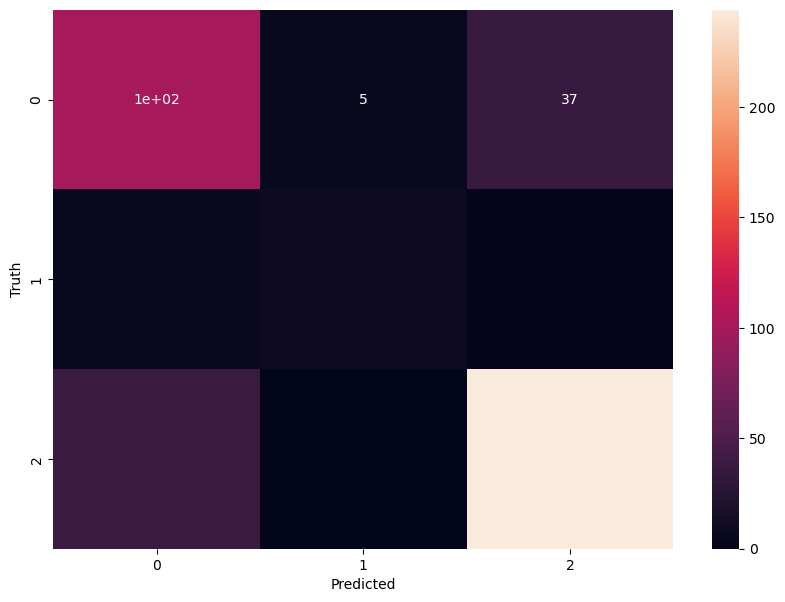

In [24]:
y_predicted = model.predict(X_test)


matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [26]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       143
           1       0.62      0.57      0.59        14
           2       0.87      0.87      0.87       282

    accuracy                           0.80       439
   macro avg       0.73      0.71      0.72       439
weighted avg       0.80      0.80      0.80       439



In [29]:
from sklearn.metrics import accuracy_score
# print(f"model accuracy: accuracy_score(y_test, y_predicted)")
print(f"model accuracy: {(accuracy_score(y_test, y_predicted))*100}%")

model accuracy: 80.41002277904327%
